In [122]:
# Submission for Coursera Data Science Capstone project 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [123]:
#collecting the data
df_raw = pd.read_csv('Data-Collisions.csv')
df_raw.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [124]:
#initial data exploration
df_raw.shape

(194673, 38)

In [125]:
#data is unbalanced with more less sever accidents
df_raw['UNDERINFL'].dtypes

dtype('O')

In [126]:
df_raw.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [127]:
#I like to keep one dataframe untouched, and then create new one for data cleaning
df_clean = df_raw[['SEVERITYCODE','WEATHER', 'ROADCOND','LIGHTCOND','INATTENTIONIND','UNDERINFL','SPEEDING']]

#Simplify columns names
df_clean.rename(columns={"INATTENTIONIND": "INATTENTION", "UNDERINFL": "DUI"}, errors="raise", inplace=True)
# Change 1 to 0, and 2 to 1
df_clean['SEVERITYCODE'] -= 1
df_clean.head()


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,INATTENTION,DUI,SPEEDING
0,1,Overcast,Wet,Daylight,NaN,N,NaN
1,0,Raining,Wet,Dark - Street Lights On,NaN,0,NaN
2,0,Overcast,Dry,Daylight,NaN,0,NaN
3,0,Clear,Dry,Daylight,NaN,N,NaN
4,1,Raining,Wet,Daylight,NaN,0,NaN


In [128]:
#Find how many zero values / empty values are in the set (external features) inorder to assess how to handle them
zerovalues = pd.DataFrame({'\"Other\"': [ df_clean['WEATHER'].value_counts()['Other'],
                                          df_clean['ROADCOND'].value_counts()['Other'],
                                          df_clean['LIGHTCOND'].value_counts()['Other']],
                           '\"Unknown\"':[ df_clean['WEATHER'].value_counts()['Unknown'],
                                          df_clean['ROADCOND'].value_counts()['Unknown'],
                                          df_clean['LIGHTCOND'].value_counts()['Unknown']],
                          'Empty': [ df_clean.shape[0]-df_clean['WEATHER'].count(),
                                     df_clean.shape[0]-df_clean['ROADCOND'].count(),
                                     df_clean.shape[0]-df_clean['LIGHTCOND'].count()]},
                          index=['WEATHER','ROADCOND','LIGHTCOND']).transpose()
zerovalues

,WEATHER,ROADCOND,LIGHTCOND
"""Other""",832,132,235
"""Unknown""",15091,15078,13473
Empty,5081,5012,5170


In [129]:
#INATTENTION - change missing values to 0, Y to 1. 
df_clean['INATTENTION'].fillna(value=0, inplace=True)
df_clean['INATTENTION'].replace("Y", 1, inplace=True)
df_clean['INATTENTION']=df_clean['INATTENTION'].astype(int)

#Same with DUI
df_clean['DUI'].fillna(value=0, inplace=True)
df_clean['DUI'].replace("Y", 1, inplace=True)
df_clean['DUI'].replace("N", 0, inplace=True)
df_clean['DUI']=df_clean['DUI'].astype(int)

#Same with speeding - assuming blank values = not speeding


#df_clean['SPEEDING'].fillna(value=0, inplace=True)
df_clean['SPEEDING'].fillna(value=0, inplace=True)
df_clean['SPEEDING'].replace("Y",1, inplace=True)
df_clean['SPEEDING']=df_clean['SPEEDING'].astype(int)

In [130]:
#for the external features we assume that missing values can be dropped
df_clean.replace('Other',np.NaN,inplace=True)
df_clean.replace('Unknown',np.NaN,inplace=True)
df_clean.replace('Empty',np.NaN,inplace=True)
df_clean.dropna(inplace=True)


In [131]:
print('Dataframe without dropped missing values:', df_raw.shape[0],'rows')
print('Dataframe with dropped missing values:', df_clean.shape[0],'rows')
print('Difference is',df_raw.shape[0]-df_clean.shape[0], 'rows, or', round(100-(df_clean.shape[0]/df_raw.shape[0])*100,2),'%')


Dataframe without dropped missing values: 194673 rows
Dataframe with dropped missing values: 169957 rows
Difference is 24716 rows, or 12.7 %


In [132]:
df_clean.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,INATTENTION,DUI,SPEEDING
0,1,Overcast,Wet,Daylight,0,0,0
1,0,Raining,Wet,Dark - Street Lights On,0,0,0
2,0,Overcast,Dry,Daylight,0,0,0
3,0,Clear,Dry,Daylight,0,0,0
4,1,Raining,Wet,Daylight,0,0,0


In [133]:
#Converting external features with one hot encoding
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['WEATHER'])], axis=1)
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['ROADCOND'])], axis=1)
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['LIGHTCOND'])], axis=1)
df_clean.drop('WEATHER',1,inplace=True)
df_clean.drop('ROADCOND',1,inplace=True)
df_clean.drop('LIGHTCOND',1,inplace=True)

In [134]:
df_clean.head(15)

,SEVERITYCODE,INATTENTION,DUI,SPEEDING,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
7,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


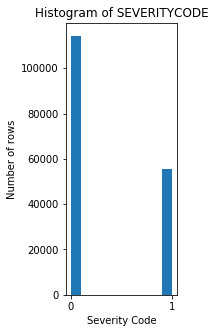

In [135]:
#Check for bias in dependent variable SEVERITYCODE
import matplotlib.pyplot as plt
%matplotlib inline 

#count, bin_edges = np.histogram(df_clean['SEVERITYCODE'])
bins = np.array([0,1])
df_clean['SEVERITYCODE'].plot(kind='hist', figsize=(2, 5), xticks=bins)
plt.title('Histogram of SEVERITYCODE') # add a title to the histogram
plt.ylabel('Number of rows') # add y-label
plt.xlabel('Severity Code') # add x-label

plt.show()

#Conclusion from historgram: data is biased and needs balancing. 

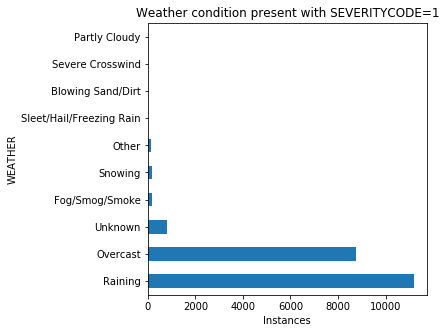

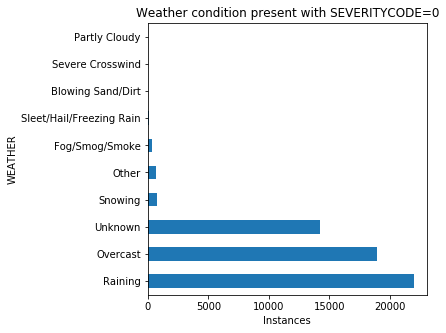

In [136]:
#build histogram of SEVERITYCODE = 1 against independt variables
df_WEATHER1 = pd.DataFrame(df_raw['WEATHER'].loc[df_raw['SEVERITYCODE']==2].value_counts()) #im using the raw data so SEVERITYCODE 1 is 2, 0 is 1
df_WEATHER0 = pd.DataFrame(df_raw['WEATHER'].loc[df_raw['SEVERITYCODE']==1].value_counts())
df_WEATHER1.drop(index='Clear').plot(kind='barh', figsize=(5,5), legend=None)
plt.title('Weather condition present with SEVERITYCODE=1')
plt.ylabel('WEATHER')
plt.xlabel('Instances')
plt.show()

df_WEATHER0.drop(index='Clear').plot(kind='barh', figsize=(5,5), legend=None)
plt.title('Weather condition present with SEVERITYCODE=0')
plt.ylabel('WEATHER')
plt.xlabel('Instances')
plt.show()


In [137]:
#this is not the most beautiful code written, but it works. I'm sure there are easier ways of doing this though

#Make dataframe with the count of severe accidents where driver was DUI, SPEEDING, or marked with INATTENTION
Severity = pd.DataFrame(df_clean['SEVERITYCODE'].loc[df_clean['DUI']==0].value_counts()).rename(columns={'SEVERITYCODE':'Not DUI'})
Severity['DUI'] = df_clean['SEVERITYCODE'].loc[df_clean['DUI']==1].value_counts()
Severity['Not SPEEDING'] = df_clean['SEVERITYCODE'].loc[df_clean['SPEEDING']==0].value_counts()
Severity['SPEEDING'] = df_clean['SEVERITYCODE'].loc[df_clean['SPEEDING']==1].value_counts()
Severity['ATTENTIVE'] = df_clean['SEVERITYCODE'].loc[df_clean['INATTENTION']==0].value_counts()
Severity['INATTENTIVE'] = df_clean['SEVERITYCODE'].loc[df_clean['INATTENTION']==1].value_counts()
Severity.index.name = 'SEVERITY'

#Make same table, only with percentages for easier reading. 
Sev_Per = pd.DataFrame(round(Severity['DUI']/Severity['DUI'].sum()*100,1))
Sev_Per['Not DUI'] = round(Severity['Not DUI']/Severity['Not DUI'].sum()*100,1)

Sev_Per['SPEEDING'] = round(Severity['SPEEDING']/Severity['SPEEDING'].sum()*100,1)
Sev_Per['Not SPEEDING'] = round(Severity['Not SPEEDING']/Severity['Not SPEEDING'].sum()*100,1)

Sev_Per['INATTENTIVE'] = round(Severity['INATTENTIVE']/Severity['INATTENTIVE'].sum()*100,1)
Sev_Per['ATTENTIVE'] = round(Severity['ATTENTIVE']/Severity['ATTENTIVE'].sum()*100,1)

print('Driving while under the influnce correlates to a ',round((Sev_Per['DUI']-Sev_Per['Not DUI'])[1],1),'% increase in severe accidents')
print('Driving while speeding correlates to a ',round((Sev_Per['SPEEDING']-Sev_Per['Not SPEEDING'])[1],1),'% increase in severe accidents')
print('Driving while inattentive correlates to a ',round((Sev_Per['INATTENTIVE']-Sev_Per['ATTENTIVE'])[1],1),'% increase in severe accidents')

Sev_Per




Driving while under the influnce correlates to a  6.7 % increase in severe accidents
Driving while speeding correlates to a  5.6 % increase in severe accidents
Driving while inattentive correlates to a  3.7 % increase in severe accidents


,DUI,Not DUI,SPEEDING,Not SPEEDING,INATTENTIVE,ATTENTIVE
SEVERITY,,,,,,
0,60.9,67.6,61.9,67.5,64.2,67.9
1,39.1,32.4,38.1,32.5,35.8,32.1


In [138]:
df_clean.describe(include="all")


,SEVERITYCODE,INATTENTION,DUI,SPEEDING,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
count,169957.00000,169957.000000,169957.000000,169957.000000,169957.000000,169957.000000,169957.000000,169957.000000,169957.000000,169957.000000,...,169957.000000,169957.000000,169957.000000,169957.000000,169957.000000,169957.000000,169957.000000,169957.000000,169957.000000,169957.000000
mean,0.32763,0.168031,0.052837,0.053455,0.000271,0.640309,0.003254,0.158411,0.000029,0.192096,...,0.004901,0.000618,0.272563,0.008284,0.006555,0.275058,0.000047,0.014198,0.662626,0.033232
std,0.46935,0.373895,0.223708,0.224939,0.016449,0.479911,0.056949,0.365127,0.005424,0.393949,...,0.069837,0.024848,0.445279,0.090641,0.080695,0.446545,0.006861,0.118306,0.472815,0.179242
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
#split testing og and training data
from sklearn.model_selection import train_test_split

X=df_clean.drop('SEVERITYCODE',1).values
y=df_clean[["SEVERITYCODE"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (118969, 26) (118969, 1)
Test set: (50988, 26) (50988, 1)


In [140]:
#balance the data using Syntetic Minority Over-sampling TEchnique (SMOTE)
#install by running: 
#pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

bal_train = SMOTE()
X_train_bal, y_train_bal = bal_train.fit_sample(X_train, y_train)

In [141]:
print('Mean of y-hat before SMOTE: ', y_train.mean())
print('Mean of y-hat after SMOTE:', y_train_bal.mean())
print('\n')
print ('Train set before SMOTE:', X_train.shape,  y_train.shape)
print ('Train set after SMOTE:', X_train_bal.shape,  y_train_bal.shape)

Mean of y-hat before SMOTE:  0.3278417066630803
Mean of y-hat after SMOTE: 0.5


Train set before SMOTE: (118969, 26) (118969, 1)
Train set after SMOTE: (159932, 26) (159932,)


# Decision Tree

In [142]:
#Build model using DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score #,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

DTree = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DTree.fit(X_train_bal,y_train_bal)

        
yhatDTree = DTree.predict(X_test)

        
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDTree, y_test))
print('F1 score for Decision Tree = ',f1_score(y_test, yhatDTree, average='weighted'))

#builde dataframe with evaluations scores for different ML algorithms
acc_df= pd.DataFrame(columns=["algorithm","Accuracy", "F1-score","LogLoss"])
acc_df = acc_df.append({'algorithm':'Decision Tree', 
                        'Accuracy': round(accuracy_score(y_test, yhatDTree),2), 
                        'F1-score':round(f1_score(y_test, yhatDTree, average='weighted'),2)}, 
                       ignore_index=True)

Accuracy score for Decision Tree =  0.5771161842002039
F1 score for Decision Tree =  0.5788250978414822


In [143]:
#confusion matrix plotting - credit to Saeed Aghabozorgi
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.69      0.68      0.68     34308
           1       0.36      0.37      0.36     16680

    accuracy                           0.58     50988
   macro avg       0.52      0.52      0.52     50988
weighted avg       0.58      0.58      0.58     50988

Confusion matrix, without normalization
[[23254 11054]
 [10508  6172]]


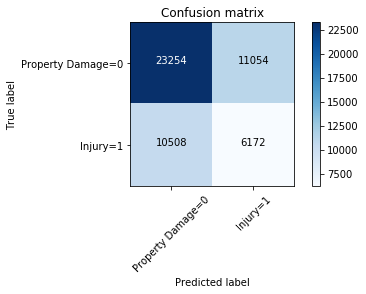

In [144]:
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=yhatDTree, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhatDTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage=0','Injury=1'],normalize= False,  title='Confusion matrix')

# K Nearest Neighbor

In [53]:
#Warning! This will take som time to complete. Let the kernel run, it will finish sooner or later
from sklearn.neighbors import KNeighborsClassifier
max_k = 15
best_k = 1
best_acc = 0
for k in range(1,max_k): #run through KNN calculations from 1 to max_k
    KNN = KNeighborsClassifier(n_neighbors = k, n_jobs=-1).fit(X_train_bal,y_train_bal) #Train Model and fit, increasing k with 1 for each run
    test_yhatKNN = KNN.predict(X_test) # predict on testset
    print("K =",k,' gives accuracy: ',accuracy_score(y_test, test_yhatKNN))
    if accuracy_score(y_test, test_yhatKNN) > best_acc:  #if this is the best accuracy achived...
        best_acc = accuracy_score(y_test, test_yhatKNN)  #keep the accuracy level as the best...
        best_k = k                                       #keep the k in 'best_k'
        yhatKNN = test_yhatKNN                           #store the model

print('Trained with K=',best_k,' acc:',best_acc) 

K = 1  gives accuracy:  0.5944732093825998
K = 2  gives accuracy:  0.6176747469992939
K = 3  gives accuracy:  0.6047501372872048
K = 4  gives accuracy:  0.6529771710990822
K = 5  gives accuracy:  0.6276378755785675
K = 6  gives accuracy:  0.6649603828351769
K = 7  gives accuracy:  0.5893347454302973
K = 8  gives accuracy:  0.6597238565937084
K = 9  gives accuracy:  0.653232133050914
K = 10  gives accuracy:  0.6704714834863105
K = 11  gives accuracy:  0.5466776496430533
K = 12  gives accuracy:  0.5521887502941869
K = 13  gives accuracy:  0.5219071153997019
K = 14  gives accuracy:  0.6467600219659527
Trained with K= 10  acc: 0.6704714834863105


In [60]:
#Selecting K based on best recall
from sklearn.metrics import recall_score
max_k = 15
best_k = 1
best_rec = 0
for k in range(1,max_k): #run through KNN calculations from 1 to max_k
    KNN = KNeighborsClassifier(n_neighbors = k, n_jobs=-1).fit(X_train_bal,y_train_bal) #Train Model and fit, increasing k with 1 for each run
    test_yhatKNN = KNN.predict(X_test) # predict on testset
    print("K =",k,' gives recall: ',recall_score(y_test, test_yhatKNN, average='binary'))
    if recall_score(y_test, test_yhatKNN, average='binary') > best_rec:  #if this is the best recall achived...
        best_rec = recall_score(y_test, test_yhatKNN, average='binary')  #keep the recall level as the best...
        best_k = k                                       #keep the k in 'best_k'
        yhatKNN = test_yhatKNN                           #store the model

print('Trained with K=',best_k,' rec:',best_rec) 


K = 1  gives recall:  0.1946642685851319
K = 2  gives recall:  0.12038369304556355
K = 3  gives recall:  0.16121103117505994
K = 4  gives recall:  0.0724220623501199
K = 5  gives recall:  0.14256594724220623
K = 6  gives recall:  0.030515587529976018
K = 7  gives recall:  0.2052757793764988
K = 8  gives recall:  0.051258992805755396
K = 9  gives recall:  0.07535971223021583
K = 10  gives recall:  0.015587529976019185
K = 11  gives recall:  0.3788369304556355
K = 12  gives recall:  0.3552158273381295
K = 13  gives recall:  0.45761390887290165
K = 14  gives recall:  0.09508393285371702
Trained with K= 13  rec: 0.45761390887290165


In [145]:
#evaluation
print('Accuracy score for KNN = ', accuracy_score(yhatKNN, y_test))
print('F1 score for KNN = ',f1_score(y_test, yhatKNN, average='weighted'))
acc_df = acc_df.append({'algorithm':'KNN', 
                        'Accuracy': round(accuracy_score(y_test, yhatKNN),2), 
                        'F1-score':round(f1_score(y_test, yhatKNN, average='weighted'),2)}, 
                       ignore_index=True)
acc_df

Accuracy score for KNN =  0.5219071153997019
F1 score for KNN =  0.5356982278066695


,algorithm,Accuracy,F1-score,LogLoss
0,Decision Tree,0.58,0.58,NaN
1,KNN,0.52,0.54,NaN


              precision    recall  f1-score   support

           0       0.68      0.55      0.61     34308
           1       0.33      0.46      0.39     16680

    accuracy                           0.52     50988
   macro avg       0.50      0.51      0.50     50988
weighted avg       0.56      0.52      0.54     50988

Confusion matrix, without normalization
[[18978 15330]
 [ 9047  7633]]


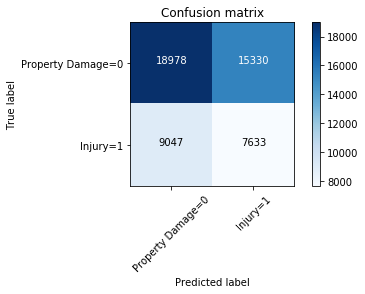

In [147]:
#Print classification report, and confusion matrix
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=yhatKNN, labels=[0,1])

print (classification_report(y_test, yhatKNN))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage=0','Injury=1'],normalize= False,  title='Confusion matrix')

# Logistic regression

In [149]:
#build model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
LR = LogisticRegression(C=0.01,solver='liblinear').fit(X_train_bal,y_train_bal) 
yhatLR = LR.predict(X_test)
yhatLR_prob = LR.predict_proba(X_test)

In [150]:
#evaluation

print('Accuracy score for Logistic Regression = ', accuracy_score(yhatLR, y_test))
print('F1 score for Logistic Regression = ',f1_score(y_test, yhatLR, average='weighted'))
acc_df = acc_df.append({'algorithm':'LR', 
                        'Accuracy': round(accuracy_score(y_test, yhatLR),2), 
                        'F1-score':round(f1_score(y_test, yhatLR, average='weighted'),2),
                        'LogLoss': round(log_loss(y_test, yhatLR_prob),2)}, 
                       ignore_index=True)
acc_df

Accuracy score for Logistic Regression =  0.5771161842002039
F1 score for Logistic Regression =  0.5792648134980629


,algorithm,Accuracy,F1-score,LogLoss
0,Decision Tree,0.58,0.58,NaN
1,KNN,0.52,0.54,NaN
2,LR,0.58,0.58,0.69


              precision    recall  f1-score   support

           0       0.69      0.68      0.68     34308
           1       0.36      0.37      0.37     16680

    accuracy                           0.58     50988
   macro avg       0.52      0.53      0.52     50988
weighted avg       0.58      0.58      0.58     50988

Confusion matrix, without normalization
[[23180 11128]
 [10434  6246]]


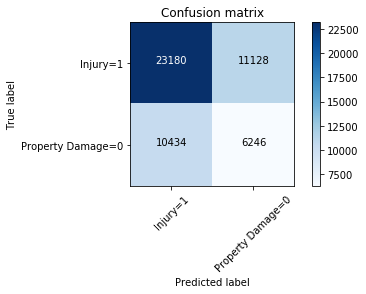

In [151]:
#Print classification report, and confusion matrix
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=yhatLR, labels=[0,1])

print (classification_report(y_test, yhatLR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[3 1]
 [4 0]]


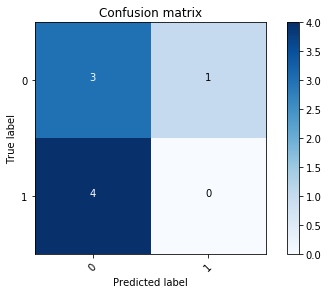

In [152]:
#plot a example matrix to use in the report
cnf_matrix = confusion_matrix(y_true=[0,0,0,0,1,1,1,1], y_pred=[0,1,0,0,0,0,0,0], labels=[0,1])
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.54      0.45      0.49     33614
           1       0.19      0.25      0.22     17374

    accuracy                           0.38     50988
   macro avg       0.36      0.35      0.35     50988
weighted avg       0.42      0.38      0.39     50988

Confusion matrix, without normalization
[[15008 18606]
 [13017  4357]]


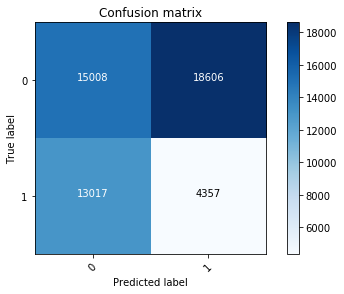

In [153]:
#slett denne
cnf_matrix = confusion_matrix(y_true=yhatLR, y_pred=yhatKNN, labels=[0,1])
print (classification_report(yhatLR, yhatKNN))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')